# IMAGE COMPRESSION WITH JPEG-LS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def predictor(a, b, c) :
    if c >= max(a, b) :
        return min(a, b)
    elif c <= min(a, b) :
        return max(a, b)
    else :
        return a + b - c

In [4]:
def calculate_prediction_error(image):
    height, width = image.shape
    prediction_error = np.zeros((height, width), dtype=np.int32)
    
    for y in range(1, height):
        for x in range(1, width):
            a = image[y, x-1]
            b = image[y-1, x]
            c = image[y-1, x-1]
            pred = predictor(a, b, c)
            prediction_error[y, x] = int(image[y, x]) - pred
    
    return prediction_error

In [6]:
def calculate_zero_percentage(prediction_error):
    total_pixels = prediction_error.size
    zero_pixels = np.sum(prediction_error == 0)
    zero_percentage = (zero_pixels / total_pixels) * 100
    return zero_percentage

In [11]:
def calculate_histogram(prediction_error):
    values, counts = np.unique(prediction_error, return_counts=True)
    return values, counts

In [12]:
def calculate_entropy(histogram):
    total_pixels = np.sum(histogram[1])
    probabilities = histogram[1] / total_pixels
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

C:\Users\Luca\AppData\Local\Temp\ipykernel_3204\3541431274.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return a + b - c


Percentage of zero pixels : 6.48%
Entropy of the prediction error image : 5.22 bits/pixel


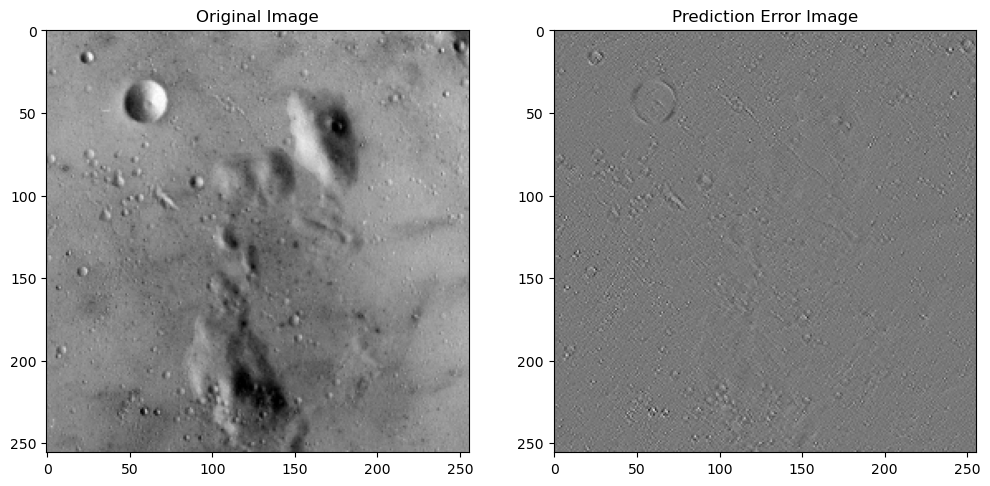

In [14]:
# Load the image and convert it to grayscale
image = Image.open('moon.tiff').convert('L')
image_array = np.array(image)

# Calculate the prediction error image
prediction_error = calculate_prediction_error(image_array)

# Calculate the percentage of zero pixels in the prediction error image
zero_percentage = calculate_zero_percentage(prediction_error)
print(f"Percentage of zero pixels : {zero_percentage:.2f}%")

# Histogram of the prediction error image
histogram = calculate_histogram(prediction_error)

# Calculate the entropy of the prediction error image
entropy = calculate_entropy(histogram)
print(f"Entropy of the prediction error image : {entropy:.2f} bits/pixel")

# Display the original image and the prediction error image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Prediction Error Image')
plt.imshow(prediction_error, cmap='gray')

plt.show()